### Amazon Review Sentiment
### Group 04
##### Comp 262 Sec 01 - Winter 2023

In [1]:
import pandas as pd
import numpy as np
import json, re, string, nltk, statistics, spacy, textwrap, warnings
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
# !pip install spacy

In [3]:
df = pd.read_json(r"G:\My Drive\Classes\Sem06\Comp262-NLP\GroupProject\Industrial_and_Scientific_5.json",lines = True)

# List the main finding of the dataset.

In [4]:
df.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,1511740800,NaN,NaN
1,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,NaN,NaN
2,5,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,Worked great for my lapping bench. I would li...,Handy!,1509062400,NaN,NaN


In [5]:
df.describe()

,overall,unixReviewTime
count,77071.000000,7.707100e+04
mean,4.524062,1.454857e+09
std,0.949668,4.559407e+07
min,1.000000,1.051402e+09
25%,4.000000,1.427674e+09
50%,5.000000,1.459469e+09
75%,5.000000,1.486944e+09
max,5.000000,1.538093e+09


In [6]:
df.shape

(77071, 12)

In [7]:
df.count()

overall           77071
verified          77071
reviewTime        77071
reviewerID        77071
asin              77071
style             36037
reviewerName      77044
reviewText        77060
summary           77061
unixReviewTime    77071
vote               9620
image              1719
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77071 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         77071 non-null  int64 
 1   verified        77071 non-null  bool  
 2   reviewTime      77071 non-null  object
 3   reviewerID      77071 non-null  object
 4   asin            77071 non-null  object
 5   style           36037 non-null  object
 6   reviewerName    77044 non-null  object
 7   reviewText      77060 non-null  object
 8   summary         77061 non-null  object
 9   unixReviewTime  77071 non-null  int64 
 10  vote            9620 non-null   object
 11  image           1719 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.5+ MB


In [9]:
#get the number of reviews in the dataset 
num_reviews = len(df)

In [10]:
# Get the average rating for the products in the dataset
avg_rating = df["overall"].mean()

In [11]:
# Get the most common rating
most_common_rating = df["overall"].value_counts().idxmax()

In [12]:
# Get the least common rating
least_common_rating = df["overall"].value_counts().idxmin()

In [13]:
# Get the average length of the review text
avg_review_length = df["reviewText"].str.len().mean()

In [14]:
#Get the most common length of the review text
most_common_length = df["reviewText"].str.len().value_counts().idxmax()

In [15]:
# Get the product with the most reviews
most_reviewed_product = df["asin"].value_counts().idxmax()

In [16]:
# Get the reviewer with the most reviews
most_prolific_reviewer = df["reviewerID"].value_counts().idxmax()

In [17]:
#Get the earliest and latest review dates
earliest_review_date = df["reviewTime"].min()
latest_review_date = df["reviewTime"].max()

In [18]:
# Print out the findings
print("Number of reviews:", num_reviews)
print("Average rating:", avg_rating)
print("Most common rating:", most_common_rating)
print("Least common rating:", least_common_rating)
print("Average review text length:", avg_review_length)
print("Most common review text length:", most_common_length)
print("Product with the most reviews:", most_reviewed_product)
print("Reviewer with the most reviews:", most_prolific_reviewer)
print("Earliest review date:", earliest_review_date)
print("Latest review date:", latest_review_date)

Number of reviews: 77071
Average rating: 4.524062228334912
Most common rating: 5
Least common rating: 2
Average review text length: 241.05223202699196
Most common review text length: 12.0
Product with the most reviews: B0013BKDO8
Reviewer with the most reviews: A3L1VJMHFWONCB
Earliest review date: 01 1, 2008
Latest review date: 12 9, 2017


In [19]:
max_product_reviews = df['asin'].value_counts().max()

In [20]:
min_product_reviews = df['asin'].value_counts().min()

In [21]:
max_user_reviews = df['reviewerID'].value_counts().max()

In [22]:
min_user_reviews = df['reviewerID'].value_counts().min()

In [23]:
print(f"Maximum number of reviews for a single product: {max_product_reviews}")
print(f"Minimum number of reviews for a single product: {min_product_reviews}")
print(f"Maximum number of reviews written by a single user: {max_user_reviews}")
print(f"Minimum number of reviews written by a single user: {min_user_reviews}")

Maximum number of reviews for a single product: 1229
Minimum number of reviews for a single product: 1
Maximum number of reviews written by a single user: 99
Minimum number of reviews written by a single user: 2


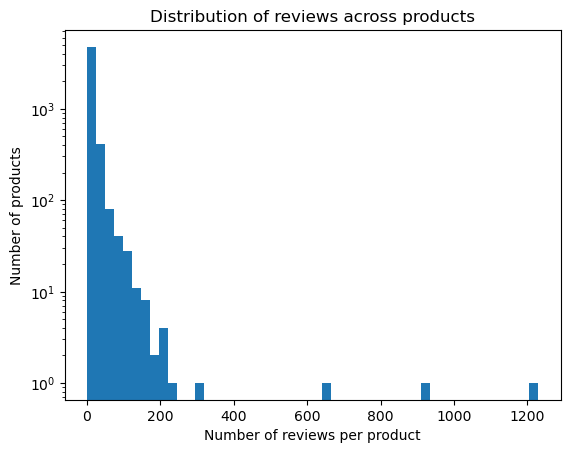

In [24]:
# Visualize the distribution of the number of reviews across products
product_review_counts = df['asin'].value_counts()
plt.hist(product_review_counts, bins=50, log=True)
plt.xlabel("Number of reviews per product")
plt.ylabel("Number of products")
plt.title("Distribution of reviews across products")
plt.show()

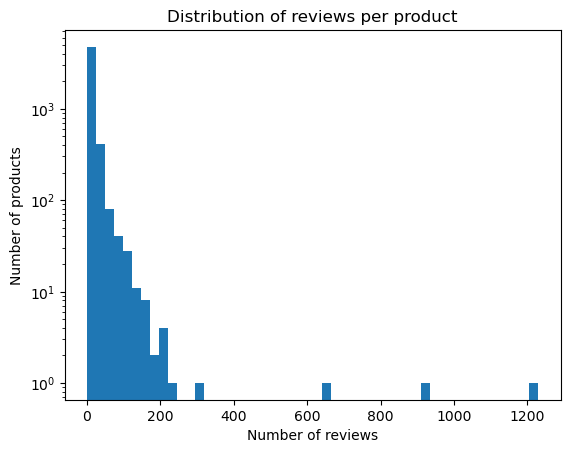

In [25]:
# Visualize the distribution of the number of reviews per product
reviews_per_product = df.groupby('asin')['overall'].count()
plt.hist(reviews_per_product, bins=50, log=True)
plt.xlabel("Number of reviews")
plt.ylabel("Number of products")
plt.title("Distribution of reviews per product")
plt.show()

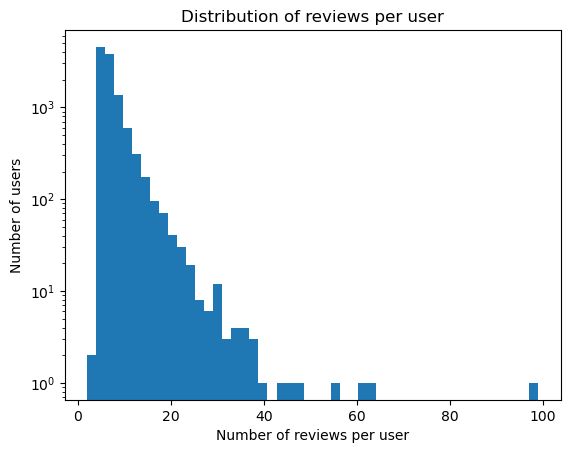

In [26]:
# Visualize the distribution of reviews per user
reviews_per_user = df.groupby('reviewerID')['overall'].count()
plt.hist(reviews_per_user, bins=50, log=True)
plt.xlabel("Number of reviews per user")
plt.ylabel("Number of users")
plt.title("Distribution of reviews per user")
plt.show()

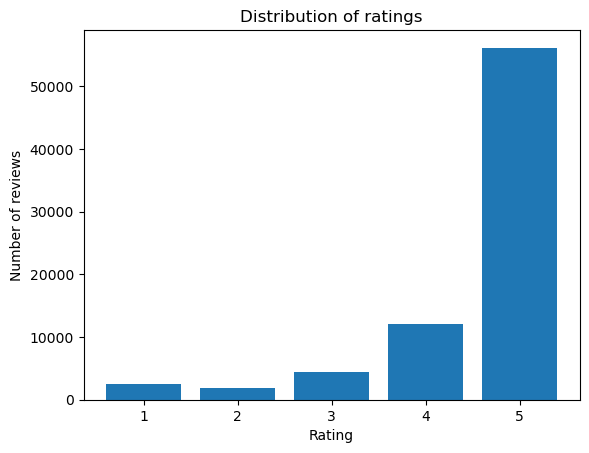

In [27]:
# Visualize the distribution of ratings
ratings_counts = df['overall'].value_counts()
plt.bar(ratings_counts.index, ratings_counts.values)
plt.xlabel("Rating")
plt.ylabel("Number of reviews")
plt.title("Distribution of ratings")
plt.show()

In [28]:
new = df['reviewTime'].str.split(",", n = 1, expand = True)
df['year'] = new[1]

In [29]:
# Concatenating review text and summary
df['reviewText'] = df['reviewText'].str.cat(df['summary'], sep=' ')

In [30]:
# Removing unnecessary columns
df = df.drop(['style','vote','image','summary','unixReviewTime','reviewTime','reviewerName'], axis=1)

In [31]:
df.head()

,overall,verified,reviewerID,asin,reviewText,year
0,5,True,A1JB7HFWHRYHT7,B0000223SI,This worked really well for what I used it for...,2017
1,5,True,A2FCLJG5GV8SD6,B0000223SI,Fast cutting and good adheasive. Good paper.,2017
2,5,False,A3IT9B33NWYQSL,B0000223SI,Worked great for my lapping bench. I would li...,2017
3,4,True,AUL5LCV4TT73P,B0000223SK,As advertised As advertised,2018
4,5,True,A1V3I3L5JKO7TM,B0000223SK,seems like a pretty good value as opposed to b...,2017


In [32]:
# removing NaN values from reviewText
df['reviewText'] = df['reviewText'].fillna('')

#getting the largest review length
largest_review_length = df['reviewText'].apply(len).max()
print("Largest review length:", largest_review_length)

Largest review length: 32223


In [33]:
#Printing the largest review before cleaning and preprocessing 
largest_review = df.loc[df['reviewText'].apply(len).idxmax(), 'reviewText']
print("Largest review:")
print(largest_review)

Largest review:
FOR OPERATING A REFRIGERATOR (or freezer ) ONLY..
STEP BY STEP (complete directions)..

UPDATE:  081511:

MOUNTED ON THE FRIG:
Added pictures of how I mounted it to the FRIG..  I did this as an after thought, and have a ton of regrets on the "mounting" design pictured (so I can tell you a whole bunch of ways to improve on this)..  The mount is simple PVC plastic plumbing pipes (used one step spray paint made for plastic and metal, $4)..  First, don't do the complicated "F" shape (shape of the assembled pipes) with all the "T" fittings and elbows I used (because you cant thread the thermostat thru the fittings, and they are unnecessary anyway)..  If you look at the picture, note that I used T fittings to make it stand off the FRIG an inch or so..  This added a lot of complication for no reason whatsoever..  FOR YOURs simple make a F, or C shape with 1" PVC pipes, and the part that touches the frig will be nothing but a pipe (no fittings on it)..  Drill hole thru pipes fo

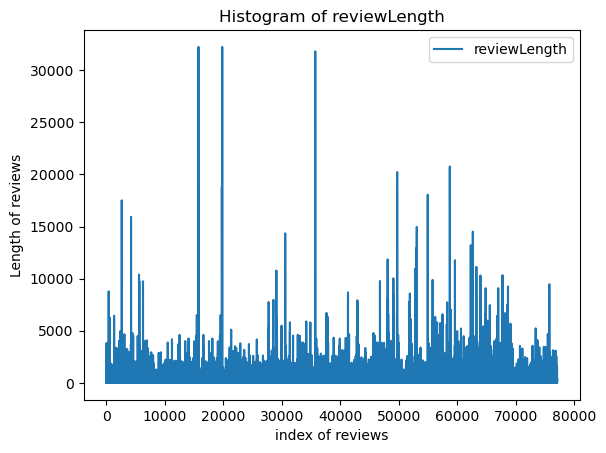

In [34]:
# Outlier detection using IQR method and Box plot
df['reviewLength'] = df['reviewText'].apply(lambda x: len(str(x)))
data_indexed = df['reviewLength'].reset_index()
data_indexed.plot(x='index',y='reviewLength')
plt.xlabel('index of reviews')
plt.ylabel('Length of reviews')
plt.title('Histogram of reviewLength')
plt.show();

<AxesSubplot:>

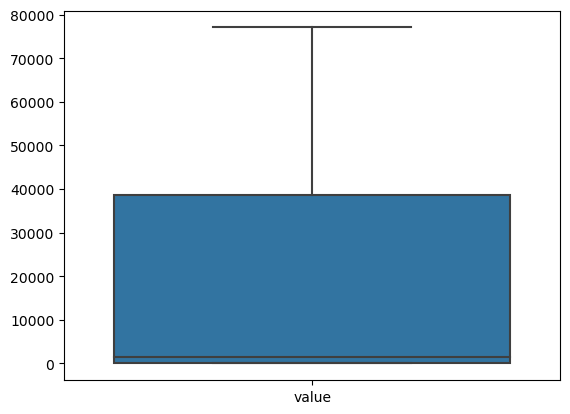

In [35]:
sns.boxplot(data = pd.melt(data_indexed))

In [36]:
median_review = statistics.median(df['reviewLength'] )
mean_review = statistics.mean(df['reviewLength'])

Q1,Q3 = np.percentile(df['reviewLength'] , [25,75])

IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

print(f'Median of reviews length is {median_review}\nMean of reviews length is {mean_review:.2f}')
print(f'Interquartile range is {IQR}')
print(f'The quartile 1 is {Q1} and quartile 3 is {Q3}')
print(f'\nLower limit for outliers is {lower_limit}\nUpper limit for outliers is {upper_limit}')

Median of reviews length is 119
Mean of reviews length is 266.06
Interquartile range is 239.0
The quartile 1 is 44.0 and quartile 3 is 283.0

Lower limit for outliers is -314.5
Upper limit for outliers is 641.5


In [37]:
# pd.set_option('mode.chained_assignment', None)

In [38]:
# Delete Unnessary Reviews with low or high length

# for i in range(len(df["reviewLength"])):
#     if df["reviewLength"][i] < 2:
#         df = df.drop([i])
#     elif df["reviewLength"][i] > upper_limit:
#         df["reviewText"][i] = textwrap.shorten(df["reviewText"][i], upper_limit, placeholder='')
#         df["reviewLength"][i] = len(df["reviewText"][i])

In [39]:
print(f'Number of reviews before dropping : {df.shape[0]}')

Number of reviews before dropping : 77071


In [40]:
# Choose only datas that have reviewLength more than 2 and less than upper_limit
df = df[(df["reviewLength"] >= 2) & (df["reviewLength"] <= upper_limit)]

In [41]:
print(f'The longest review after shorten is {max(df["reviewLength"])}\n')
print(f'The shortest review after dropping is {min(df["reviewLength"])}')

The longest review after shorten is 641

The shortest review after dropping is 3


In [42]:
print(f'Number of reviews after dropping : {df.shape[0]}')

Number of reviews after dropping : 70017


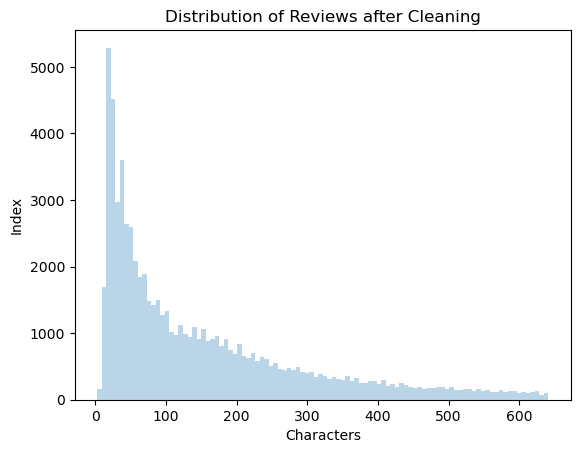

In [43]:
num_bin = 100
plt.hist(df['reviewLength'],num_bin,alpha=0.3)
plt.xlabel('Characters')
plt.ylabel('Index')
plt.title('Distribution of Reviews after Cleaning')
plt.show()

<AxesSubplot:>

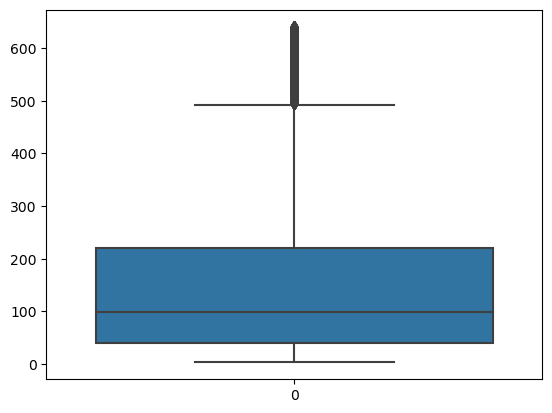

In [44]:
sns.boxplot(data = df["reviewLength"])

In [45]:
print(f'Number of reviews before dropping duplicates: {df.shape[0]}')

df = df.drop_duplicates()

print(f'Number of reviews after dropping duplicates: {df.shape[0]}')

Number of reviews before dropping duplicates: 70017
Number of reviews after dropping duplicates: 65993


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65993 entries, 0 to 77070
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   overall       65993 non-null  int64 
 1   verified      65993 non-null  bool  
 2   reviewerID    65993 non-null  object
 3   asin          65993 non-null  object
 4   reviewText    65993 non-null  object
 5   year          65993 non-null  object
 6   reviewLength  65993 non-null  int64 
dtypes: bool(1), int64(2), object(4)
memory usage: 3.6+ MB


In [47]:
df.head(3)

,overall,verified,reviewerID,asin,reviewText,year,reviewLength
0,5,True,A1JB7HFWHRYHT7,B0000223SI,This worked really well for what I used it for...,2017,442
1,5,True,A2FCLJG5GV8SD6,B0000223SI,Fast cutting and good adheasive. Good paper.,2017,44
2,5,False,A3IT9B33NWYQSL,B0000223SI,Worked great for my lapping bench. I would li...,2017,250


# Text basic pre-processing

In [48]:
def lable_ratings(data):
    if data['overall'] >= 4:
        data['ratings'] = 'Positive'
    elif data['overall'] <= 2:
        data['ratings'] = 'Negative'
    else:
        data['ratings'] = 'Neutral'
    return data

df = df.apply(lable_ratings, axis = 1)

In [49]:
df.head()

,overall,verified,reviewerID,asin,reviewText,year,reviewLength,ratings
0,5,True,A1JB7HFWHRYHT7,B0000223SI,This worked really well for what I used it for...,2017,442,Positive
1,5,True,A2FCLJG5GV8SD6,B0000223SI,Fast cutting and good adheasive. Good paper.,2017,44,Positive
2,5,False,A3IT9B33NWYQSL,B0000223SI,Worked great for my lapping bench. I would li...,2017,250,Positive
3,4,True,AUL5LCV4TT73P,B0000223SK,As advertised As advertised,2018,27,Positive
4,5,True,A1V3I3L5JKO7TM,B0000223SK,seems like a pretty good value as opposed to b...,2017,149,Positive


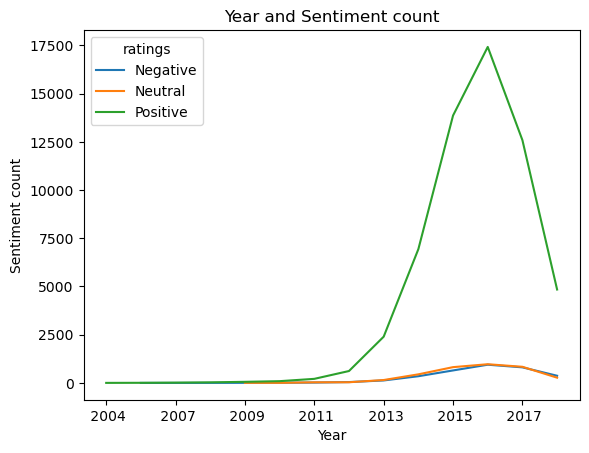

In [50]:
df.groupby(['year','ratings'])['ratings'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

In [51]:
nlp = spacy.load("en_core_web_sm")

In [52]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arsam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arsam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

In [54]:
emoji_pattern = re.compile('['
        '\U0001F1E0-\U0001F1FF'  # flags (iOS)
        '\U0001F300-\U0001F5FF'  # symbols & pictographs
        '\U0001F600-\U0001F64F'  # emoticons
        '\U0001F680-\U0001F6FF'  # transport & map symbols
        '\U0001F700-\U0001F77F'  # alchemical symbols
        '\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
        '\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
        '\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
        '\U0001FA00-\U0001FA6F'  # Chess Symbols
        '\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
        '\U00002702-\U000027B0'  # Dingbats
        '\U000024C2-\U0001F251'
        ']+')

In [55]:
def preprocessing(text, keep_emojis=True):
    text = text.lower()                    # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'<[^>]+>', '', text)    # Remove HTML tags
    text = re.sub(r'http\S+', '', text)    # Remove URLs
    text = re.sub(r'\s+', ' ', text)       # Remove whitespace 
    text = re.sub(r'\d+', '', text)        # Remove digits
    
    if not keep_emojis:
        text = emoji_pattern.sub('', text) # Remove emojis

    words = nltk.word_tokenize(text)       # Tokenize the text
    stopwords_list = set(stopwords.words('english'))
    stopwords_list.difference_update({'not', 'no', 'never', 'don', "don't", 'doesn', "doesn't", 'isn', "isn't", 'wasn', "wasn't"})
    words = [word for word in words if word not in stopwords_list] # Remove stopwords
    lemmatizer = WordNetLemmatizer()       # Lemmatize the words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(lemmatized_words)
    return text

In [56]:
# One test to show removing emojis
sample_text = "This product is amazing! 😍"

print(f'Without Emojis >>>\t{preprocessing(sample_text, False)}')
print(f'With Emojis    >>>\t{preprocessing(sample_text)}')

Without Emojis >>>	product amazing
With Emojis    >>>	product amazing 😍


In [57]:
# Number of reviews that have emojis
num_reviews_with_emojis = df['reviewText'].astype(str).str.contains(emoji_pattern, regex=True).sum()

print(f'Number of all reviews that have emojis: {num_reviews_with_emojis}')

Number of all reviews that have emojis: 0


In [58]:
# Because we don't have any emojis in our dataset then we only create one column

df['clean_reviews'] = df['reviewText'].astype(str).apply(preprocessing)

In [59]:
df['reviewText'][100]

'works and wears well and fit perfect Five Stars'

In [60]:
df['clean_reviews'][100]

'work wear well fit perfect five star'

In [61]:
#Largest review after cleaning and preprocessing
largest_review = df.loc[df['clean_reviews'].apply(len).idxmax(), 'clean_reviews']
print("Largest review:")
print(largest_review)

Largest review:
good glue product say would prefer quicker bond used thick application chip repair stone counter top end result good strong easily trimmed razor blade sandpaper finish desired almost invisible used typically thin ca application wood paper china etc bond quickly frugal tip use dipped needle point drop application instead applicator tip supplied much glue dry wasted inside applicator tip bottle last much longer using needle store glue frig longer life solid product top quality


In [62]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
df[['reviewText', 'clean_reviews']].head(100)

,reviewText,clean_reviews
0,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None Couldn't have been happier with it's performance",worked really well used purpose getting full mark around great durable afforable sandpaper pro grit cut really fast evenly no random deep scratch like seen cheaper paper didnt even hint clogging adhesive needed no permanent wasnt going anywhere con none couldnt happier performance
1,Fast cutting and good adheasive. Good paper.,fast cutting good adheasive good paper
2,"Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that. Handy!",worked great lapping bench would like adhesive backed waxed paper storage keeping grit first inch still functioned arrived used rubber cement remedy handy
3,As advertised As advertised,advertised advertised
4,seems like a pretty good value as opposed to buying it at the big box stores by the sheet. seems like a pretty good value as opposed to buying it ...,seems like pretty good value opposed buying big box store sheet seems like pretty good value opposed buying
...,...,...
108,They work well Good disks,work well good disk
109,"Item exactly as advertised, cuts great. This blade seems to cut better than the cheap Harbor Freight ones, but not very much better. cuts great. This blade seems to cut better than the ...",item exactly advertised cut great blade seems cut better cheap harbor freight one not much better cut great blade seems cut better
110,Fast ship great product Thanks Five Stars,fast ship great product thanks five star
111,This is a good blade for my chop saw. I have used generic ones that may be just a bit lower cost but they seem to wear much faster than this one does. First time buying one of these on Amazon and it was delivered well and quickly. I will buy this again when needed. The blade is well made and seems to be lasting. Good quality and seems to have more life than others I have used,good blade chop saw used generic one may bit lower cost seem wear much faster one first time buying one amazon delivered well quickly buy needed blade well made seems lasting good quality seems life others used


In [63]:
df.head(2)

,overall,verified,reviewerID,asin,reviewText,year,reviewLength,ratings,clean_reviews
0,5,True,A1JB7HFWHRYHT7,B0000223SI,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None Couldn't have been happier with it's performance",2017,442,Positive,worked really well used purpose getting full mark around great durable afforable sandpaper pro grit cut really fast evenly no random deep scratch like seen cheaper paper didnt even hint clogging adhesive needed no permanent wasnt going anywhere con none couldnt happier performance
1,5,True,A2FCLJG5GV8SD6,B0000223SI,Fast cutting and good adheasive. Good paper.,2017,44,Positive,fast cutting good adheasive good paper


In [64]:
df['cleanLength'] = df['clean_reviews'].apply(lambda x: len(str(x)))

In [65]:
df['reviewLength'] = df['reviewText'].apply(lambda x: len(str(x)))

In [66]:
df[['reviewText', 'reviewLength', 'clean_reviews', 'cleanLength']].head()

,reviewText,reviewLength,clean_reviews,cleanLength
0,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None Couldn't have been happier with it's performance",442,worked really well used purpose getting full mark around great durable afforable sandpaper pro grit cut really fast evenly no random deep scratch like seen cheaper paper didnt even hint clogging adhesive needed no permanent wasnt going anywhere con none couldnt happier performance,281
1,Fast cutting and good adheasive. Good paper.,44,fast cutting good adheasive good paper,38
2,"Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that. Handy!",250,worked great lapping bench would like adhesive backed waxed paper storage keeping grit first inch still functioned arrived used rubber cement remedy handy,154
3,As advertised As advertised,27,advertised advertised,21
4,seems like a pretty good value as opposed to buying it at the big box stores by the sheet. seems like a pretty good value as opposed to buying it ...,149,seems like pretty good value opposed buying big box store sheet seems like pretty good value opposed buying,107


In [67]:
df.head(2)

,overall,verified,reviewerID,asin,reviewText,year,reviewLength,ratings,clean_reviews,cleanLength
0,5,True,A1JB7HFWHRYHT7,B0000223SI,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None Couldn't have been happier with it's performance",2017,442,Positive,worked really well used purpose getting full mark around great durable afforable sandpaper pro grit cut really fast evenly no random deep scratch like seen cheaper paper didnt even hint clogging adhesive needed no permanent wasnt going anywhere con none couldnt happier performance,281
1,5,True,A2FCLJG5GV8SD6,B0000223SI,Fast cutting and good adheasive. Good paper.,2017,44,Positive,fast cutting good adheasive good paper,38


In [68]:
# Select a random sample of 2000 reviews

sample_size = 2000
sample_df = df.sample(n=sample_size, random_state=1)

In [69]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 41768 to 53010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   overall        2000 non-null   int64 
 1   verified       2000 non-null   bool  
 2   reviewerID     2000 non-null   object
 3   asin           2000 non-null   object
 4   reviewText     2000 non-null   object
 5   year           2000 non-null   object
 6   reviewLength   2000 non-null   int64 
 7   ratings        2000 non-null   object
 8   clean_reviews  2000 non-null   object
 9   cleanLength    2000 non-null   int64 
dtypes: bool(1), int64(3), object(6)
memory usage: 158.2+ KB


In [70]:
sample_df.head(3)

,overall,verified,reviewerID,asin,reviewText,year,reviewLength,ratings,clean_reviews,cleanLength
41768,4,True,A1JUPR7LPMYG1X,B00CI9VIM0,"Perfect fit- easy to clean up your chocolate spills, very sturdy Cake boards",2017,76,Positive,perfect fit easy clean chocolate spill sturdy cake board,56
52565,2,True,ACJEQZ3EXBJFL,B00KVY2FM6,Bought this in August and it quit working Worked great till then. Quit working in 5 months,2017,91,Negative,bought august quit working worked great till quit working month,63
57085,5,True,A2H1BBOTQ2VXGL,B00PF7EPCM,"Deep rich purple color, prints wonderfully used the whole spool with 0 problems. prints wonderfully used the whole spool with 0 problems",2017,136,Positive,deep rich purple color print wonderfully used whole spool problem print wonderfully used whole spool problem,108


In [71]:
sample_df.overall.value_counts()

5    1478
4     303
3     108
1      59
2      52
Name: overall, dtype: int64

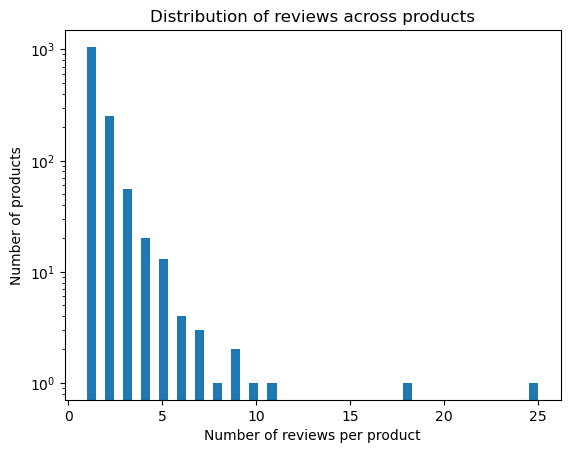

In [72]:
# Visualize the distribution of the number of reviews across products
product_review_counts = sample_df['asin'].value_counts()
plt.hist(product_review_counts, bins=50, log=True)
plt.xlabel("Number of reviews per product")
plt.ylabel("Number of products")
plt.title("Distribution of reviews across products")
plt.show()

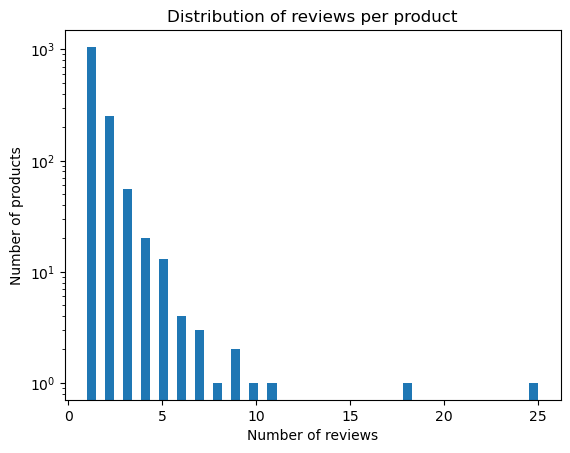

In [73]:
# Visualize the distribution of the number of reviews per product
reviews_per_product = sample_df.groupby('asin')['overall'].count()
plt.hist(reviews_per_product, bins=50, log=True)
plt.xlabel("Number of reviews")
plt.ylabel("Number of products")
plt.title("Distribution of reviews per product")
plt.show()

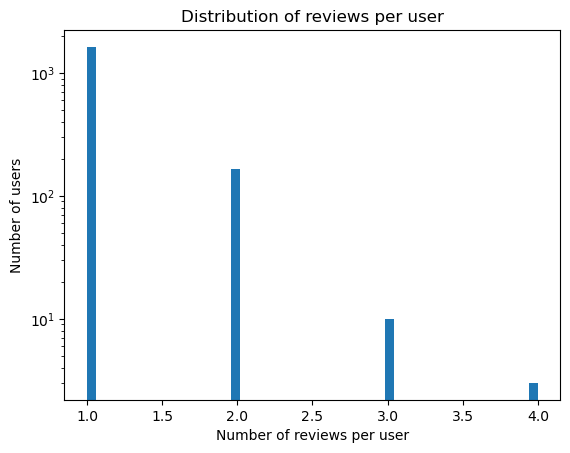

In [74]:
# Visualize the distribution of reviews per user
reviews_per_user = sample_df.groupby('reviewerID')['overall'].count()
plt.hist(reviews_per_user, bins=50, log=True)
plt.xlabel("Number of reviews per user")
plt.ylabel("Number of users")
plt.title("Distribution of reviews per user")
plt.show()

# Text representation

In [75]:
# cv = CountVectorizer()
# count_vectors = cv.fit_transform(df.clean_reviews)

In [76]:
# print("Count Matrix:\n", count_vectors.toarray()[:10])
# print("Feature Names:\n", cv.get_feature_names()[:10])

In [77]:
# TFIDF(Term Frequency — Inverse Document Frequency)
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform(sample_df.clean_reviews)

In [78]:
print("TF-IDF Matrix:\n", tfidf_vectors.toarray()[:10])
print("Feature Names:\n", tfidf.get_feature_names()[:10])

TF-IDF Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Feature Names:
 ['aa', 'aaa', 'ab', 'ability', 'able', 'absolute', 'absolutely', 'absorbent', 'absorbs', 'abuse']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [79]:
tfidf_weigths = [(word, tfidf_vectors.getcol(idx).sum()) for word, idx in tfidf.vocabulary_.items()]
tfidf_weigths[:10]

[('perfect', 27.942572913273118),
 ('fit', 15.870672993841687),
 ('easy', 20.188298920850247),
 ('clean', 7.978286514320568),
 ('chocolate', 0.9059602578092438),
 ('spill', 1.5714598655589105),
 ('sturdy', 6.102109612472921),
 ('cake', 0.45553520484971194),
 ('board', 4.027372349383596),
 ('bought', 12.22408714466111)]

# Sentiment Analysis

### Valence Aware Dictionary and Sentiment Reasoner (VADR) 

VADER performs very well with emojis, slangs and acronyms in sentences. Let us see each with an example.
https://medium.com/analytics-vidhya/sentiment-analysis-using-the-vader-library-a91a888e4afd#:~:text=VADER%20performs%20very%20well%20with,see%20each%20with%20an%20example.

In [80]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arsam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [81]:
sid = SentimentIntensityAnalyzer()

sample_df['vaderLexicon'] = sample_df['clean_reviews'].apply(lambda t: sid.polarity_scores(t)["compound"])

<AxesSubplot:title={'center':'Sentiment Valence Distribution'}, ylabel='Frequency'>

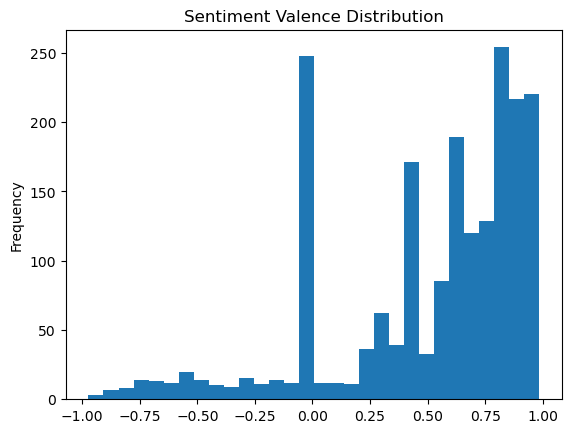

In [82]:
sample_df['vaderLexicon'].plot(
    kind='hist',
    bins=30,
    xlabel='vaderLexicon',
    ylabel='count',
    title='Sentiment Valence Distribution')

In [83]:
# Valence Aware Dictionary and Sentiment Reasoner sentiment analysis

def vaderLexicon_model(data):
    if data['vaderLexicon'] > 0.05:
        data['sentiment_v'] = 'Positive'
    elif data['vaderLexicon'] < -0.05:
        data['sentiment_v'] = 'Negative'
    else:
        data['sentiment_v'] = 'Neutral'
    return data

In [84]:
sample_df = sample_df.apply(vaderLexicon_model, axis = 1)

In [85]:
sample_df.head(3)

,overall,verified,reviewerID,asin,reviewText,year,reviewLength,ratings,clean_reviews,cleanLength,vaderLexicon,sentiment_v
41768,4,True,A1JUPR7LPMYG1X,B00CI9VIM0,"Perfect fit- easy to clean up your chocolate spills, very sturdy Cake boards",2017,76,Positive,perfect fit easy clean chocolate spill sturdy cake board,56,0.8957,Positive
52565,2,True,ACJEQZ3EXBJFL,B00KVY2FM6,Bought this in August and it quit working Worked great till then. Quit working in 5 months,2017,91,Negative,bought august quit working worked great till quit working month,63,0.6249,Positive
57085,5,True,A2H1BBOTQ2VXGL,B00PF7EPCM,"Deep rich purple color, prints wonderfully used the whole spool with 0 problems. prints wonderfully used the whole spool with 0 problems",2017,136,Positive,deep rich purple color print wonderfully used whole spool problem print wonderfully used whole spool problem,108,0.7906,Positive


In [86]:
sample_df['sentiment_v'].where(sample_df['sentiment_v'].values == sample_df['ratings'].values).notna().value_counts()

True     1554
False     446
Name: sentiment_v, dtype: int64

In [87]:
sample_df[['ratings','sentiment_v']].value_counts()

ratings   sentiment_v
Positive  Positive       1481
          Neutral         205
          Negative         95
Neutral   Positive         63
Negative  Negative         52
          Positive         42
Neutral   Negative         24
          Neutral          21
Negative  Neutral          17
dtype: int64



Vader Lexicon:
              precision    recall  f1-score   support

    Negative       0.30      0.47      0.37       111
     Neutral       0.09      0.19      0.12       108
    Positive       0.93      0.83      0.88      1781

    accuracy                           0.78      2000
   macro avg       0.44      0.50      0.46      2000
weighted avg       0.85      0.78      0.81      2000



<AxesSubplot:>

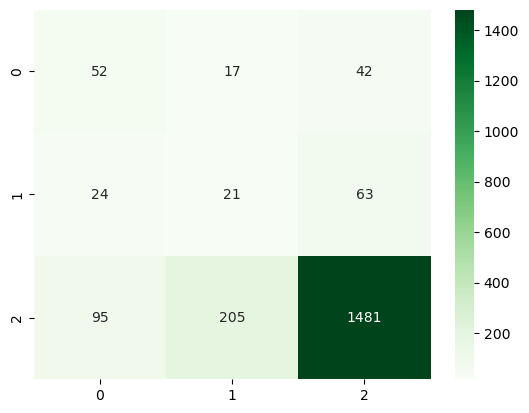

In [88]:
print(f"\n\nVader Lexicon:\n{classification_report(sample_df['ratings'], sample_df['sentiment_v'])}")

data_cm = confusion_matrix(sample_df['ratings'], sample_df['sentiment_v'])
sns.heatmap(data_cm, annot=True, fmt='', cmap='Greens')

In [89]:
print("Confusion Matrix of Vader Tool:\n")
print("                     Predicted")
print("         | Positive |  Neutral | Negative |")
print("---------|----------|----------|----------|")
print(f"Positive | {data_cm[0][0]:^8} | {data_cm[0][1]:^8} | {data_cm[0][2]:^8} |")
print("---------|----------|----------|----------|")
print(f"Neutral  | {data_cm[1][0]:^8} | {data_cm[1][1]:^8} | {data_cm[1][2]:^8} |")
print("---------|----------|----------|----------|")
print(f"Negative | {data_cm[2][0]:^8} | {data_cm[2][1]:^8} | {data_cm[2][2]:^8} |")

Confusion Matrix of Vader Tool:

                     Predicted
         | Positive |  Neutral | Negative |
---------|----------|----------|----------|
Positive |    52    |    17    |    42    |
---------|----------|----------|----------|
Neutral  |    24    |    21    |    63    |
---------|----------|----------|----------|
Negative |    95    |   205    |   1481   |


### TextBlob sentiment analysis tool

 TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc
 https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524#:~:text=TextBlob%20has%20semantic%20labels%20that,exclamation%20mark%2C%20emojis%2C%20etc.

In [90]:
sample_df['TextBlob'] = sample_df['clean_reviews'].apply(lambda t: TextBlob(t).sentiment.polarity)

<AxesSubplot:title={'center':'Sentiment TextBlob Distribution'}, ylabel='Frequency'>

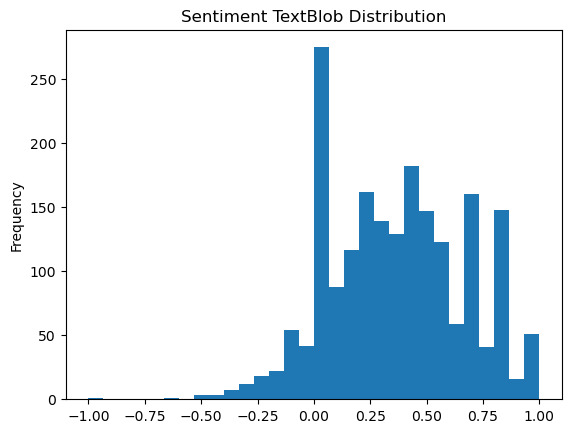

In [91]:
sample_df['TextBlob'].plot(
    kind='hist',
    bins=30,
    xlabel='polarity',
    ylabel='count',
    title='Sentiment TextBlob Distribution')

In [92]:
def TextBlob_model(data):
    if data['TextBlob'] > 0.05:
        data['sentiment_b'] = 'Positive'
    elif data['TextBlob'] < -0.05:
        data['sentiment_b'] = 'Negative'
    else:
        data['sentiment_b'] = 'Neutral'
    return data

In [93]:
sample_df = sample_df.apply(TextBlob_model, axis = 1)

In [94]:
sample_df['sentiment_b'].where(sample_df['sentiment_b'].values == sample_df['ratings'].values).notna().value_counts()

True     1522
False     478
Name: sentiment_b, dtype: int64

In [95]:
sample_df[['ratings','sentiment_b']].value_counts()

ratings   sentiment_b
Positive  Positive       1464
          Neutral         241
          Negative         76
Neutral   Positive         72
Negative  Positive         44
          Negative         38
          Neutral          29
Neutral   Neutral          20
          Negative         16
dtype: int64



TextBlob Lexicon:
              precision    recall  f1-score   support

    Negative       0.29      0.34      0.32       111
     Neutral       0.07      0.19      0.10       108
    Positive       0.93      0.82      0.87      1781

    accuracy                           0.76      2000
   macro avg       0.43      0.45      0.43      2000
weighted avg       0.85      0.76      0.80      2000



<AxesSubplot:>

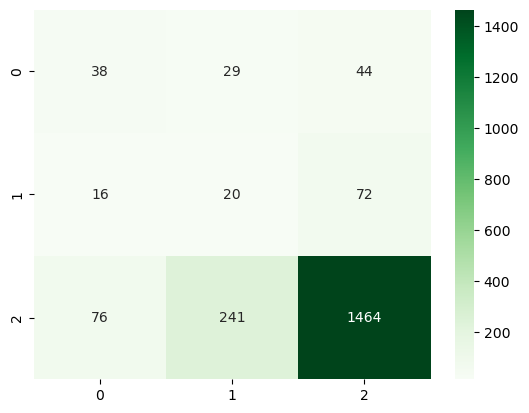

In [96]:
print(f"\n\nTextBlob Lexicon:\n{classification_report(sample_df['ratings'], sample_df['sentiment_b'])}")

data_cmb = confusion_matrix(sample_df['ratings'], sample_df['sentiment_b'])
sns.heatmap(data_cmb, annot=True, fmt='', cmap='Greens')

In [97]:
print("Confusion Matrix of TextBlob Tool:\n")
print("                     Predicted")
print("         | Positive |  Neutral | Negative |")
print("---------|----------|----------|----------|")
print(f"Positive | {data_cmb[0][0]:^8} | {data_cmb[0][1]:^8} | {data_cmb[0][2]:^8} |")
print("---------|----------|----------|----------|")
print(f"Neutral  | {data_cmb[1][0]:^8} | {data_cmb[1][1]:^8} | {data_cmb[1][2]:^8} |")
print("---------|----------|----------|----------|")
print(f"Negative | {data_cmb[2][0]:^8} | {data_cmb[2][1]:^8} | {data_cmb[2][2]:^8} |")

Confusion Matrix of TextBlob Tool:

                     Predicted
         | Positive |  Neutral | Negative |
---------|----------|----------|----------|
Positive |    38    |    29    |    44    |
---------|----------|----------|----------|
Neutral  |    16    |    20    |    72    |
---------|----------|----------|----------|
Negative |    76    |   241    |   1464   |


### SENTIWORDNET  sentiment analysis tool

In [98]:
# a word is a tuple (w, tag) such as ('bathrooms', 'NNS')
# Convert between the PennTreebank tags to simple Wordnet tags
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [99]:
def SENTIWORDNET_model(data):
    token = word_tokenize(data)
    after_tagging = pos_tag(token)
    sentiment = 0.0
    tokens_count = 0
    
    for word, tag in after_tagging:
        wn_tag = penn_to_wn(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            continue
        #lemmatize token
        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        if not lemma:
            continue
        #all synsets of the word
        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            continue
        
        # take the first sense
        synset = synsets[0]
        #SentiWordNet synset
        swn_synset = swn.senti_synset(synset.name()) 
        #polarity score for the word
        sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
        tokens_count += 1
    
    if sentiment > 0.05:
        return 'Positive'
    elif sentiment < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [100]:
sample_df['sentiment_s'] = sample_df['clean_reviews'].apply( lambda x : SENTIWORDNET_model(x) )

In [101]:
sample_df['sentiment_s'].where(sample_df['sentiment_s'].values == sample_df['ratings'].values).notna().value_counts()

True     1266
False     734
Name: sentiment_s, dtype: int64



SENTIWORDNET Lexicon:
              precision    recall  f1-score   support

    Negative       0.18      0.60      0.27       111
     Neutral       0.04      0.14      0.06       108
    Positive       0.94      0.66      0.78      1781

    accuracy                           0.63      2000
   macro avg       0.38      0.47      0.37      2000
weighted avg       0.84      0.63      0.71      2000



<AxesSubplot:>

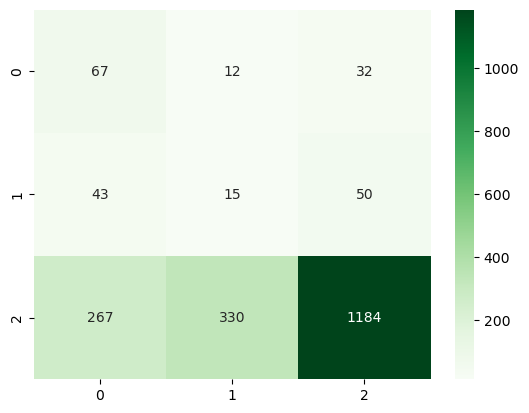

In [102]:
print(f"\n\nSENTIWORDNET Lexicon:\n{classification_report(sample_df['ratings'], sample_df['sentiment_s'])}")

data_cmb_s = confusion_matrix(sample_df['ratings'], sample_df['sentiment_s'])
sns.heatmap(data_cmb_s, annot=True, fmt='', cmap='Greens')

In [103]:
print("Confusion Matrix of SENTIWORDNET Tool:\n")
print("                     Predicted")
print("         | Positive |  Neutral | Negative |")
print("---------|----------|----------|----------|")
print(f"Positive | {data_cmb_s[0][0]:^8} | {data_cmb_s[0][1]:^8} | {data_cmb_s[0][2]:^8} |")
print("---------|----------|----------|----------|")
print(f"Neutral  | {data_cmb_s[1][0]:^8} | {data_cmb_s[1][1]:^8} | {data_cmb_s[1][2]:^8} |")
print("---------|----------|----------|----------|")
print(f"Negative | {data_cmb_s[2][0]:^8} | {data_cmb_s[2][1]:^8} | {data_cmb_s[2][2]:^8} |")

Confusion Matrix of SENTIWORDNET Tool:

                     Predicted
         | Positive |  Neutral | Negative |
---------|----------|----------|----------|
Positive |    67    |    12    |    32    |
---------|----------|----------|----------|
Neutral  |    43    |    15    |    50    |
---------|----------|----------|----------|
Negative |   267    |   330    |   1184   |


In [104]:
sample_df.head(3)

,overall,verified,reviewerID,asin,reviewText,year,reviewLength,ratings,clean_reviews,cleanLength,vaderLexicon,sentiment_v,TextBlob,sentiment_b,sentiment_s
41768,4,True,A1JUPR7LPMYG1X,B00CI9VIM0,"Perfect fit- easy to clean up your chocolate spills, very sturdy Cake boards",2017,76,Positive,perfect fit easy clean chocolate spill sturdy cake board,56,0.8957,Positive,0.5500,Positive,Positive
52565,2,True,ACJEQZ3EXBJFL,B00KVY2FM6,Bought this in August and it quit working Worked great till then. Quit working in 5 months,2017,91,Negative,bought august quit working worked great till quit working month,63,0.6249,Positive,0.8000,Positive,Negative
57085,5,True,A2H1BBOTQ2VXGL,B00PF7EPCM,"Deep rich purple color, prints wonderfully used the whole spool with 0 problems. prints wonderfully used the whole spool with 0 problems",2017,136,Positive,deep rich purple color print wonderfully used whole spool problem print wonderfully used whole spool problem,108,0.7906,Positive,0.4625,Positive,Negative


In [105]:
sample_df[['clean_reviews','vaderLexicon','TextBlob']].head(3)

,clean_reviews,vaderLexicon,TextBlob
41768,perfect fit easy clean chocolate spill sturdy cake board,0.8957,0.5500
52565,bought august quit working worked great till quit working month,0.6249,0.8000
57085,deep rich purple color print wonderfully used whole spool problem print wonderfully used whole spool problem,0.7906,0.4625


In [106]:
sample_df[['sentiment_v','sentiment_b','sentiment_s']].head(3)

,sentiment_v,sentiment_b,sentiment_s
41768,Positive,Positive,Positive
52565,Positive,Positive,Negative
57085,Positive,Positive,Negative


In [107]:
print(f"Accuracy of Vader Lexicon: {accuracy_score(sample_df['sentiment_v'],sample_df['ratings']):.4f}")
print(f"Accuracy of TextBlob Lexicon: {accuracy_score(sample_df['sentiment_b'],sample_df['ratings']):.4f}")
print(f"Accuracy of SENTIWORDNET Lexicon: {accuracy_score(sample_df['sentiment_s'],sample_df['ratings']):.4f}")

Accuracy of Vader Lexicon: 0.7770
Accuracy of TextBlob Lexicon: 0.7610
Accuracy of SENTIWORDNET Lexicon: 0.6330


# Phase 02

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Logistic Regression :
<li>simple and fast to train
<li>well-suited for problems with two or more classes
<li>easily extended to handle multiclass problem

Gradient Boosting:
<li>good at handling complex datasets with a large number of features
<li>produce very accurate predictions 
<li>particularly well-suited for problems with imbalanced classes

In [109]:
remaining_df = df[~df.index.isin(sample_df.index)]
print(f'Length Data is {len(df)} and Sample is {len(sample_df)} and remaining is {len(remaining_df)}')

Length Data is 65993 and Sample is 2000 and remaining is 63993


In [110]:
remaining_df.head(3)

,overall,verified,reviewerID,asin,reviewText,year,reviewLength,ratings,clean_reviews,cleanLength
0,5,True,A1JB7HFWHRYHT7,B0000223SI,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None Couldn't have been happier with it's performance",2017,442,Positive,worked really well used purpose getting full mark around great durable afforable sandpaper pro grit cut really fast evenly no random deep scratch like seen cheaper paper didnt even hint clogging adhesive needed no permanent wasnt going anywhere con none couldnt happier performance,281
1,5,True,A2FCLJG5GV8SD6,B0000223SI,Fast cutting and good adheasive. Good paper.,2017,44,Positive,fast cutting good adheasive good paper,38
2,5,False,A3IT9B33NWYQSL,B0000223SI,"Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that. Handy!",2017,250,Positive,worked great lapping bench would like adhesive backed waxed paper storage keeping grit first inch still functioned arrived used rubber cement remedy handy,154


In [111]:
x = remaining_df['clean_reviews']
y = remaining_df['ratings']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=12)
print(f'Train: {X_train.shape}, {y_train.shape}')
print(f'Test : {X_test.shape}, {y_test.shape}\n')

Train: (44795,), (44795,)
Test : (19198,), (19198,)



In [112]:
def train_model(X_train, y_train):
    
    tfidf = TfidfVectorizer()
    X_train_vect = tfidf.fit_transform(X_train)

    lr_model = LogisticRegression()
    lr_model.fit(X_train_vect, y_train)

    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train_vect, y_train)

    return {'lr_model': lr_model, 'gb_model': gb_model, 'tfidf': tfidf}

In [113]:
def test_model(models, X_test, y_test):
    X_test_vect = models['tfidf'].transform(X_test)

    lr_prediction = models['lr_model'].predict(X_test_vect)
    lr_accuracy = accuracy_score(y_test, lr_prediction)
    lr_precision = precision_score(y_test, lr_prediction, average='weighted')
    lr_recall = recall_score(y_test, lr_prediction, average='weighted')
    lr_f1 = f1_score(y_test, lr_prediction, average='weighted')

    gb_prediction = models['gb_model'].predict(X_test_vect)
    gb_accuracy = accuracy_score(y_test, gb_prediction)
    gb_precision = precision_score(y_test, gb_prediction, average='weighted')
    gb_recall = recall_score(y_test, gb_prediction, average='weighted')
    gb_f1 = f1_score(y_test, gb_prediction, average='weighted')

    vader_accuracy = accuracy_score(sample_df['sentiment_v'], sample_df['ratings'])
    print('Vader Lexicon:')
    print(f"\tAccuracy :{vader_accuracy:.2f}")

    print('\nLogistic Regression:')
    print(f'\tAccuracy : {lr_accuracy:.2f}')
    print(f'\tPrecision: {lr_precision:.2f}')
    print(f'\tRecall: {lr_recall:.2f}')
    print(f'\tF1 Score: {lr_f1:.2f}')

    print('\nGradient Boosting:')
    print(f'\tAccuracy : {gb_accuracy:.2f}')
    print(f'\tPrecision: {gb_precision:.2f}')
    print(f'\tRecall: {gb_recall:.2f}')
    print(f'\tF1 Score: {gb_f1:.2f}')

    return {'lr_accuracy': lr_accuracy, 'gb_accuracy': gb_accuracy, 'vader_accuracy': vader_accuracy}

In [117]:
# Train our models
models_before_recommender = train_model(X_train, y_train)

# Test our models on test dataset
test_before_recommender = test_model(models, X_test, y_test)

Vader Lexicon:
	Accuracy :0.78

Logistic Regression:
	Accuracy : 0.93
	Precision: 0.92
	Recall: 0.93
	F1 Score: 0.92

Gradient Boosting:
	Accuracy : 0.92
	Precision: 0.92
	Recall: 0.92
	F1 Score: 0.90


In [118]:
# Test our models on 2000 samples
sample_x = sample_df['clean_reviews']
sample_y = sample_df['ratings']

sample_before_recommender = test_model(models, sample_x, sample_y)

Vader Lexicon:
	Accuracy :0.78

Logistic Regression:
	Accuracy : 0.93
	Precision: 0.92
	Recall: 0.93
	F1 Score: 0.92

Gradient Boosting:
	Accuracy : 0.92
	Precision: 0.91
	Recall: 0.92
	F1 Score: 0.89


#### Recommender systems based on user reviews
using sentiment analysis techniques to extract the sentiment of the review and then use it to adjust the rating value (For example, if a review text expresses a positive sentiment, but the rating value is low, this may indicate that the product has some flaws that were not severe enough to warrant a very negative rating, but still impacted the user's experience. In such cases, the rating value could be adjusted upwards to reflect the positive sentiment expressed in the review text)

In [128]:
remaining_df.loc[:, 'vaderLexicon'] = remaining_df['clean_reviews'].apply(lambda t: sid.polarity_scores(t)["compound"])

In [130]:
remaining_df.head(1)

,overall,verified,reviewerID,asin,reviewText,year,reviewLength,ratings,clean_reviews,cleanLength,adjusted_overall,vaderLexicon,sentiment_v
0,5,True,A1JB7HFWHRYHT7,B0000223SI,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None Couldn't have been happier with it's performance",2017,442,Positive,worked really well used purpose getting full mark around great durable afforable sandpaper pro grit cut really fast evenly no random deep scratch like seen cheaper paper didnt even hint clogging adhesive needed no permanent wasnt going anywhere con none couldnt happier performance,281,NaN,0.6463,Positive


In [131]:
remaining_df['adjusted_overall'] = ((remaining_df['overall'] + (remaining_df['overall'] * remaining_df['vaderLexicon']))/2).round(1)

In [120]:
sample_df['adjusted_overall'] = ((sample_df['overall'] + (sample_df['overall'] * sample_df['vaderLexicon']))/2).round(1)

In [132]:
sample_df[['overall','adjusted_overall']]

,overall,adjusted_overall
41768,4,3.8
52565,2,1.6
57085,5,4.5
55699,1,0.8
70910,5,4.7
...,...,...
45973,5,3.9
55464,5,2.5
27083,5,4.6
23434,5,4.6


In [133]:
print(min(sample_df['adjusted_overall']))
print(max(sample_df['adjusted_overall']))

0.0
5.0


In [134]:
def lable_ratings(data):
    if data['adjusted_overall'] >= 3.3:
        data['adjusted_rating'] = 'Positive'
    elif data['adjusted_overall'] <= 1.7:
        data['adjusted_rating'] = 'Negative'
    else:
        data['adjusted_rating'] = 'Neutral'
    return data

remaining_df = remaining_df.apply(lable_ratings, axis = 1)
sample_df = sample_df.apply(lable_ratings, axis = 1)

In [135]:
x = remaining_df['clean_reviews']
y = remaining_df['ratings']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=12)

In [136]:
# Train our models
models_after_recommender = train_model(X_train, y_train)

# Test our models on test dataset
test_after_recommender = test_model(models, X_test, y_test)

Vader Lexicon:
	Accuracy :0.78

Logistic Regression:
	Accuracy : 0.93
	Precision: 0.92
	Recall: 0.93
	F1 Score: 0.92

Gradient Boosting:
	Accuracy : 0.92
	Precision: 0.92
	Recall: 0.92
	F1 Score: 0.90


In [137]:
sample_x = sample_df['clean_reviews']
sample_y = sample_df['adjusted_rating']

In [138]:
sample_after_recommender = test_model(models, sample_x, sample_y)

Vader Lexicon:
	Accuracy :0.78

Logistic Regression:
	Accuracy : 0.70
	Precision: 0.66
	Recall: 0.70
	F1 Score: 0.60

Gradient Boosting:
	Accuracy : 0.68
	Precision: 0.67
	Recall: 0.68
	F1 Score: 0.57


In [140]:
print('Test Before and After Recommendation:\n')
print('Model                 Before Recommender     After Recommender')
print('='*70)
print('Vader Sentiment      {:^20.2f}     {:^20.2f}'.format(test_before_recommender['vader_accuracy'], test_after_recommender['vader_accuracy']))
print('Logistic Regression  {:^20.2f}     {:^20.2f}'.format(test_before_recommender['lr_accuracy'], test_after_recommender['lr_accuracy']))
print('Gradient Boosting    {:^20.2f}     {:^20.2f}'.format(test_before_recommender['gb_accuracy'], test_after_recommender['gb_accuracy']))

Test Before and After Recommendation:

Model                 Before Recommender     After Recommender
Vader Sentiment              0.78                     0.78        
Logistic Regression          0.93                     0.93        
Gradient Boosting            0.92                     0.92        


In [141]:
print('Sample Before and After Recommendation:\n')

print('Model                 Before Recommender     After Recommender')
print('='*70)
print('Vader Sentiment      {:^20.2f}     {:^20.2f}'.format(sample_before_recommender['vader_accuracy'], sample_after_recommender['vader_accuracy']))
print('Logistic Regression  {:^20.2f}     {:^20.2f}'.format(sample_before_recommender['lr_accuracy'], sample_after_recommender['lr_accuracy']))
print('Gradient Boosting    {:^20.2f}     {:^20.2f}'.format(sample_before_recommender['gb_accuracy'], sample_after_recommender['gb_accuracy']))

Sample Before and After Recommendation:

Model                 Before Recommender     After Recommender
Vader Sentiment              0.78                     0.78        
Logistic Regression          0.93                     0.70        
Gradient Boosting            0.92                     0.68        
